# NEIU Deployment 7/7 Data Analysis

## Import Statements

In [1]:
## Import statements
import glob
import os
import tempfile
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from datetime import datetime
from datetime import timedelta

from math import atan2 as atan2
from datetime import datetime

from metpy.plots import USCOUNTIES
from metpy.calc import dewpoint_from_relative_humidity
from metpy.units import units
from matplotlib.dates import DateFormatter, date2num
import imageio
import pyart
import nexradaws

import sage_data_client

templocation = tempfile.mkdtemp()

warnings.filterwarnings("ignore")


## You are using the Python ARM Radar Toolkit (Py-ART), an open source
## library for working with weather radar data. Py-ART is partly
## supported by the U.S. Department of Energy as part of the Atmospheric
## Radiation Measurement (ARM) Climate Research Facility, an Office of
## Science user facility.
##
## If you use this software to prepare a publication, please cite:
##
##     JJ Helmus and SM Collis, JORS 2016, doi: 10.5334/jors.119



## Serinus Data Analysis from 7/7

This is an anlysis of data collected from 7/7 at NEIU. These instruments were deployed for a couple of hours at NEIU on 7/7 to compare against the AQT at NEIU. 

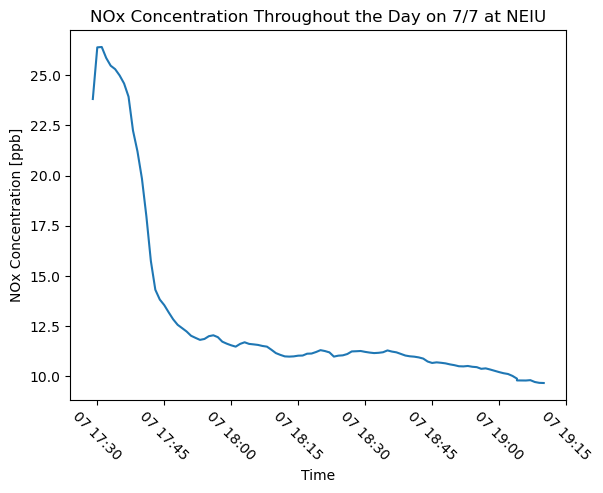

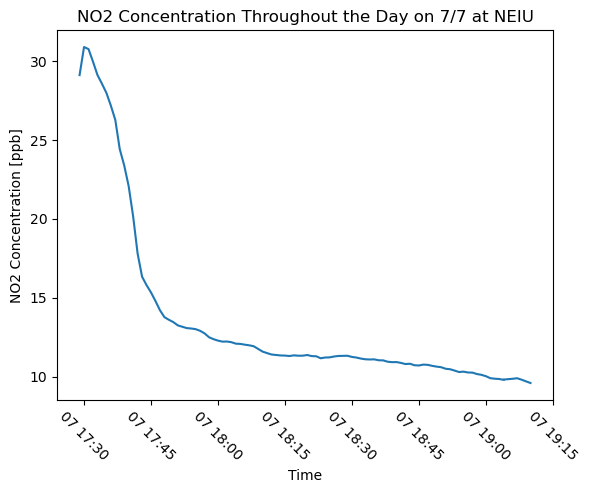

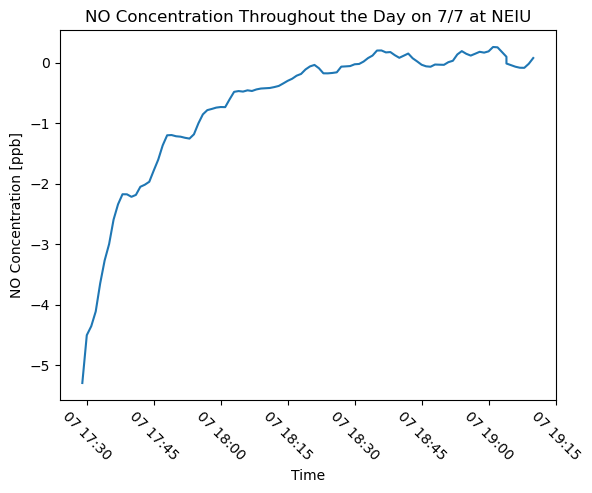

In [2]:
# This is the header information given from the attached dataset. 
NOx_header = ["Mysterious Value", "Time", "Output 1", "NO Concentration Average", "Output 2", "NOx Concentration Average", "Output 3", "NO2 Concentration Average", "Output 4", "NO Concentration", "Output 5", "NOx Concentration", "Output 6", "NO2 Concentration", "Output 7", "Gas Flow", "Output 8", "Chassis Temperature", "Output 9", "Instrument Status", "Output 10", "Instrument State", "Output 11", "Instrument Units", "Output 12", "Filter Type"]
NOx_data = pd.read_csv("NOx_07072023.txt", header=None)
NOx_data.set_axis(NOx_header, axis=1, inplace=True)

# Dropping the header information columns because we don't need them. 
NOx_data.drop(['Output 1', 'Output 2', 'Output 3', 'Output 4', 'Output 5', 'Output 6', 'Output 7', 'Output 8', 'Output 9', 'Output 10', 'Output 11', 'Output 12'], axis=1, inplace=True)
# Dropping the first few datasets - The Ozone sensor was getting warmed up... 
NOx_data.drop(labels=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30,31,32,33,34,35,36,37,38,39,40], axis=0, inplace=True)
## Creating the time variable as a datetime object, easier to handle and plot with. 
time_array_NOx = ["None"] * len(NOx_data["Time"])
original_NOx = np.asarray(NOx_data["Time"])
dt = []
## Going through every every NOx_data element.
for i in range(len(NOx_data["Time"])):
    time_array_NOx[i] = original_NOx[i].replace("/", "-")
    dt.append(datetime.strptime(time_array_NOx[i], '%Y-%m-%d %H:%M:%S'))
new_dt_NOx = []
## Changing the data to account for UTC
for i in dt:
    new_dt_NOx.append(i + timedelta(hours=5))

# Creating the Plots of NOx from te Serinus data.
plot = plt.plot(new_dt_NOx, NOx_data["NOx Concentration Average"])
plt.xlabel("Time")
plt.ylabel("NOx Concentration [ppb]")
plt.title("NOx Concentration Throughout the Day on 7/7 at NEIU")
plt.xticks(rotation=315)
plt.savefig("NOx_Serinus")

## Creating the plots of NO2 from the Serinus data. 
plt.figure()
plt.plot(new_dt_NOx, NOx_data["NO2 Concentration Average"])
plt.xlabel("Time")
plt.ylabel("NO2 Concentration [ppb]")
plt.title("NO2 Concentration Throughout the Day on 7/7 at NEIU")
plt.xticks(rotation=315)
plt.savefig("NO2_Serinus")

## Creating the plots of NO from the Serinus data.
plt.figure()
plt.plot(new_dt_NOx, NOx_data["NO Concentration Average"])
plt.xlabel("Time")
plt.ylabel("NO Concentration [ppb]")
plt.title("NO Concentration Throughout the Day on 7/7 at NEIU")
plt.xticks(rotation=315)
plt.savefig("NO_Serinus")

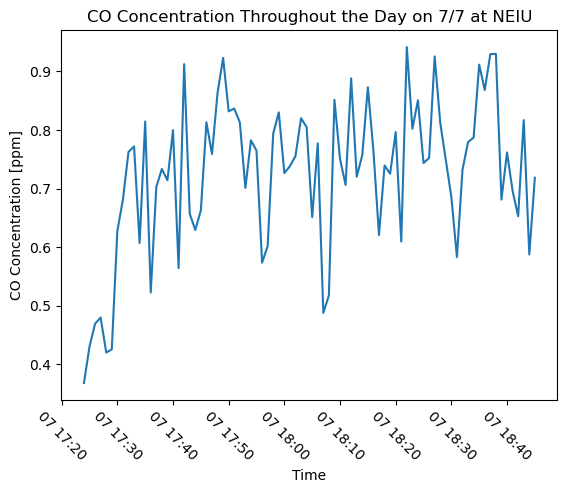

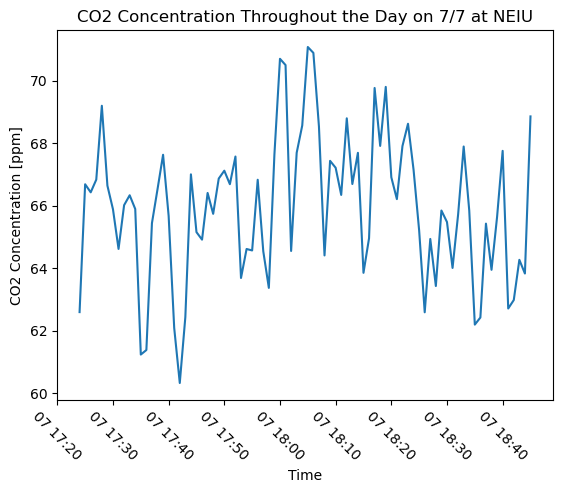

In [3]:
# This is the header information given from the attached dataset. 
CO_header = ["Mysterious Item", "Time", "Output 1", "CO Concentration", "Output 2", "CO2 Concentration", "Output 3", "CO Concentration Average", "Output 4", "CO2 Concentration Average", "Output 5", "Gas Flow", "Output 6", "Ambient Pressure", "Output 7", "Chassis Temperature", "Output 8", "Cooler Temperature", "Output 9", "Instrument Status", "Output 10", "Instrument State", "Output 11", "Primary Raw Concentration", "Output 12", "Noise"]
CO_data = pd.read_csv("CO_07072023.txt", header=None)
CO_data.set_axis(CO_header, axis=1, inplace=True)

# Dropping the header information columns because we don't need them. 
CO_data.drop(['Output 1', 'Output 2', 'Output 3', 'Output 4', 'Output 5', 'Output 6', 'Output 7', 'Output 8', 'Output 9', 'Output 10', 'Output 11', 'Output 12'], axis=1, inplace=True)
# Dropping the first few datasets - The Ozone sensor was getting warmed up... 
CO_data.drop(labels=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18, 19, 20, 21, 22, 23,24, 25, 26, 27, 28, 29, 30, 31, 32, 33,34, 35,36], axis=0, inplace=True)

## Creating the time variable as a datetime object, easier to handle and plot with. 
time_array_CO = ["None"] * len(CO_data["Time"])
original_CO = np.asarray(CO_data["Time"])
dt = []
## Going through the array for every element in the CO_data.
for i in range(len(CO_data["Time"])):
    time_array_CO[i] = original_CO[i].replace("/", "-")
    dt.append(datetime.strptime(time_array_CO[i], '%Y-%m-%d %H:%M:%S'))
new_dt_CO = []
## Adjusting the time data to account for UTC
for i in dt:
    new_dt_CO.append(i + timedelta(hours=5))

# Creating the plots of CO from the Serinus data.
plot = plt.plot(new_dt_CO[0:82], CO_data["CO Concentration Average"][0:82])
plt.xlabel("Time")
plt.ylabel("CO Concentration [ppm]")
plt.title("CO Concentration Throughout the Day on 7/7 at NEIU")
plt.xticks(rotation=315)
plt.savefig("CO_Serinus")

## Creating the plots of CO2 from the Serinus data.
plt.figure()
plt.plot(new_dt_CO[0:82], CO_data["CO2 Concentration Average"][0:82])
plt.xlabel("Time")
plt.ylabel("CO2 Concentration [ppm]")
plt.title("CO2 Concentration Throughout the Day on 7/7 at NEIU")
plt.xticks(rotation=315)
plt.savefig("CO2_Serinus")

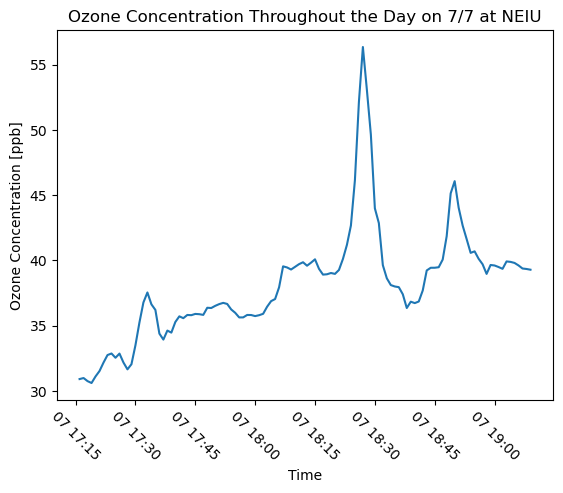

In [4]:
# This is the header information given from the attached dataset. 
o3_header = ["Station ID", "Time", "Output 1", "Ozone Average", "Output 2", "PGA Gain", "Output 3", "Instrument Gain", "Output 4", "Lamp Current", "Output 5", "Gas Pressure", "Output 6", "Ambeint Pressure", "Output 7", "Chassis Temperature", "Output 8", "Lamp Temperature", "Output 9", "Instrument Status", "Output 10", "Instrument State", "Output 11", "Instrument Units", "Output 12", "Filter Type"]
o3_data = pd.read_csv("O3_07072023.txt", header=None)
o3_data.set_axis(o3_header, axis=1, inplace=True)
# Dropping the header information columns because we don't need them. 
o3_data.drop(['Output 1', 'Output 2', 'Output 3', 'Output 4', 'Output 5', 'Output 6', 'Output 7', 'Output 8', 'Output 9', 'Output 10', 'Output 11', 'Output 12'], axis=1, inplace=True)
# Dropping the first few datasets - The Ozone sensor was getting warmed up... 
o3_data.drop(labels=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19], axis=0, inplace=True)

## Creating the time variable as a datetime object, easier to handle and plot with. 
time_array_o3 = ["None"] * len(o3_data["Time"])
original_o3 = np.asarray(o3_data["Time"])
dt = []
## Going through every element in array o3_data and making it into a datetime variable. 
for i in range(len(o3_data["Time"])):
    time_array_o3[i] = original_o3[i].replace("/", "-")
    dt.append(datetime.strptime(time_array_o3[i], '%Y-%m-%d %H:%M:%S'))
new_dt = []
## Offsetting the datetime by 5 hours to account for UTC.
for i in dt:
    new_dt.append(i + timedelta(hours=5))

## Making a plot of ozone. 
plot = plt.plot(new_dt, o3_data["Ozone Average"])
plt.xlabel("Time")
plt.ylabel("Ozone Concentration [ppb]")
plt.title("Ozone Concentration Throughout the Day on 7/7 at NEIU")
plt.xticks(rotation=315)
plt.savefig("Ozone_Serinus")

In [5]:
## Setting date and time variabes.
DATE = "2023-07-07"
# Times must be in UTC
TIME_START = "16:53:00"
TIME_STOP = "19:10:00"
RADAR_ID = "KLOT"

In [6]:
## NEIU AQT - Downloading data.
df_aq = sage_data_client.query(start = DATE + 'T' + TIME_START + 'Z',
                               end = DATE + 'T' + TIME_STOP + 'Z', 
                               filter={
                                        "plugin": "registry.sagecontinuum.org/jrobrien/waggle-aqt:0.23.5.*",
                                       }
)
# extract the particle measurements from the DataFrame
pm25 = df_aq[df_aq['name']=='aqt.particle.pm2.5']
pm10 = df_aq[df_aq['name']=='aqt.particle.pm1']
pm100 = df_aq[df_aq['name']=='aqt.particle.pm10']

# extract the gas measurements from the DataFrame
no = df_aq[df_aq['name']=='aqt.gas.no']
o3 = df_aq[df_aq['name']=='aqt.gas.ozone']
no2 = df_aq[df_aq['name']=='aqt.gas.no2']
co = df_aq[df_aq['name']=='aqt.gas.co']

# extract the environment data from the DataFrame
aqtemp = df_aq[df_aq['name']=='aqt.env.temp']
aqhum = df_aq[df_aq['name']=='aqt.env.humidity']

# Convert values to numpy arrays
aqvals = pm25.set_index('timestamp')
aqvals['pm2.5'] = aqvals.value.to_numpy().astype(float)
aqvals['pm1.0'] = pm10.value.to_numpy().astype(float)
aqvals['pm10.0'] = pm100.value.to_numpy().astype(float)
aqvals['no'] = no.value.to_numpy().astype(float)
aqvals['o3'] = o3.value.to_numpy().astype(float)
aqvals['no2'] = no2.value.to_numpy().astype(float)
aqvals['co'] = co.value.to_numpy().astype(float)
aqvals['temp'] =  aqtemp.value.to_numpy().astype(float)
aqvals['hum'] =  aqhum.value.to_numpy().astype(float)

# Use MetPY to calculate dewpoint from temperature and relative humidity
dp = dewpoint_from_relative_humidity( aqvals.temp.to_numpy() * units.degC, 
                                     aqvals.hum.to_numpy() * units.percent)

aqvals['dewpoint'] = dp

## Comparing Serinus Data with AQT

This section compares the AQT data with Serinus data. Both were collected at NEIU on 7/7. The AQT did experience a power outage for part of this deployment, and this might have affected the data after the power came back on.

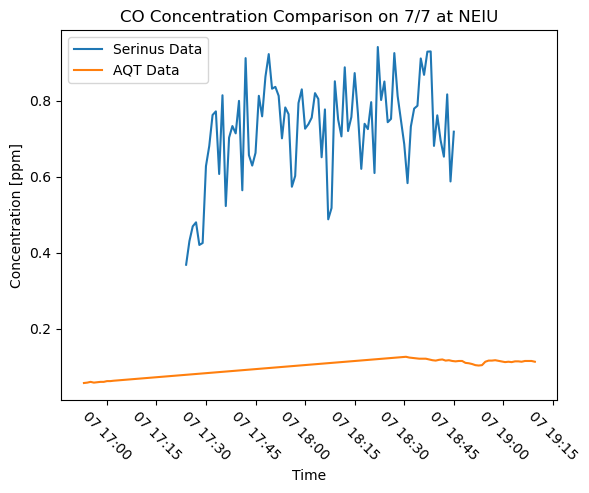

In [7]:
## Creating a plot of CO. After time t=82 minutes, the data was corrupted and therefore unuseable.
plt.plot(new_dt_CO[0:82], CO_data["CO Concentration Average"][0:82], label="Serinus Data")
plt.plot(co["timestamp"], co["value"], label="AQT Data")
plt.xticks(rotation=315)
plt.xlabel("Time")
plt.ylabel("Concentration [ppm]")
plt.title("CO Concentration Comparison on 7/7 at NEIU")
plt.legend()
plt.savefig("CO_NEIU")

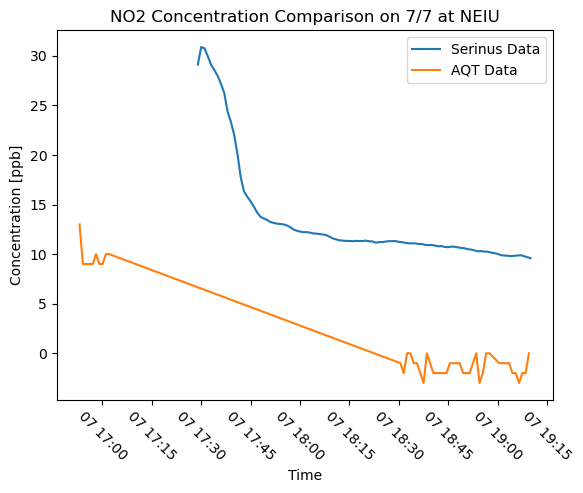

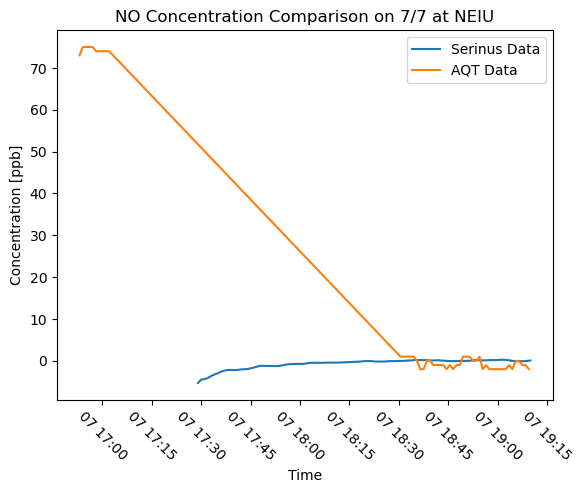

In [8]:
## Comparing the NO2 Serinus dataset to the AQT dataset.
## Recall the AQT dataset had values in ppm, and therefore needs to be coverted to ppb.
plt.plot(new_dt_NOx, NOx_data["NO2 Concentration Average"], label="Serinus Data")
plt.plot(no2["timestamp"], no2["value"]*1000, label="AQT Data")
plt.xticks(rotation=315)
plt.xlabel("Time")
plt.ylabel("Concentration [ppb]")
plt.title("NO2 Concentration Comparison on 7/7 at NEIU")
plt.legend()
plt.savefig("NO2_NEIU")

## Comparing Serinus NO values to AQT NO values.
## Recall AQT NO was in ppm, and therefore needs to be converted to ppb.
plt.figure()
plt.plot(new_dt_NOx, NOx_data["NO Concentration Average"], label="Serinus Data")
plt.plot(no["timestamp"], no["value"]*1000, label="AQT Data")
plt.xticks(rotation=315)
plt.xlabel("Time")
plt.ylabel("Concentration [ppb]")
plt.title("NO Concentration Comparison on 7/7 at NEIU")
plt.legend()
plt.savefig("NO_NEIU")

(array([19545.70833333, 19545.71875   , 19545.72916667, 19545.73958333,
        19545.75      , 19545.76041667, 19545.77083333, 19545.78125   ,
        19545.79166667, 19545.80208333]),
 [Text(19545.708333333332, 0, '07 17:00'),
  Text(19545.71875, 0, '07 17:15'),
  Text(19545.729166666668, 0, '07 17:30'),
  Text(19545.739583333332, 0, '07 17:45'),
  Text(19545.75, 0, '07 18:00'),
  Text(19545.760416666668, 0, '07 18:15'),
  Text(19545.770833333332, 0, '07 18:30'),
  Text(19545.78125, 0, '07 18:45'),
  Text(19545.791666666668, 0, '07 19:00'),
  Text(19545.802083333332, 0, '07 19:15')])

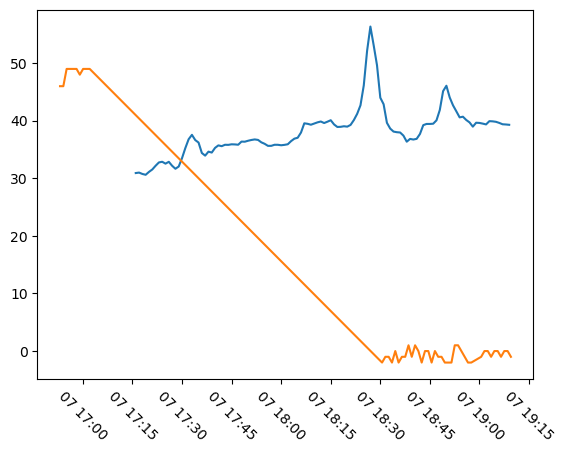

In [9]:
## Plotting O3 from both Serinus and AQT
## Recall the AQT had values in ppm, and needs to be offset by 1000 to get it into ppb.
plt.plot(new_dt, o3_data["Ozone Average"])
plt.plot(o3["timestamp"], o3["value"]*1000)
plt.xticks(rotation=315)

## Comparing Serinus Data against EPA data

This section compares data collected from the Seirnus sensors at NEIU and data collected from nearby EPA stations. EPA stations only report every hour, which does not match the frequency of that reported from the Serinus 

In [10]:
## Assessing Waggle Node at NEIU
## Making a graph of one station that is located clostest to ATMOS

import os

import matplotlib.pyplot as plt

import act

# You need an account and token from https://docs.airnowapi.org/ first
token = "D7EB47D8-30DA-4E6C-AB31-3EAB5C2E78D3"

if token is not None and len(token) > 0:
    # This first example will get the forcasted values for the date passed
    # at stations within 100 miles of the Zipcode. Can also use latlon instead as
    # results = act.discovery.get_airnow_forecast(token, '2022-05-01', distance=100,
    #                                             latlon=[41.958, -88.12])
    # If the username and token are not set, use the existing sample file
    results = act.discovery.get_airnow_forecast(token, '2022-05-01', zipcode=60439, distance=100)

    # The results show a dataset with air quality information from Oklahoma City
    # The data is not indexed by time and just a rudimentary xarray object from
    # converted from a pandas DataFrame.  Note that the AirNow API labels the data
    # returned as AQI.
    # print(results)
    print(type(results))

    # This call gives the daily average for Ozone, PM2.5 and PM10
    results = act.discovery.get_airnow_obs(token, date='2023-05-24', zipcode=60439, distance=100)
    # print(results)
    # print(type(results))

    # This call will get all the station data for a time period within
    # the bounding box provided.  This will return the object with time
    # as a coordinate and can be used with ACT Plotting to plot after
    # squeezing the dimensions.  It can be a 2D time series
    lat_lon = '-87.81703552,41.930289109,-87.61703552,42.030289109'
    results = act.discovery.get_airnow_bounded_obs(
        token, '2023-07-07T16', '2023-07-07T20', lat_lon, 'OZONE,PM25', data_type='B'
    )

<class 'xarray.core.dataset.Dataset'>


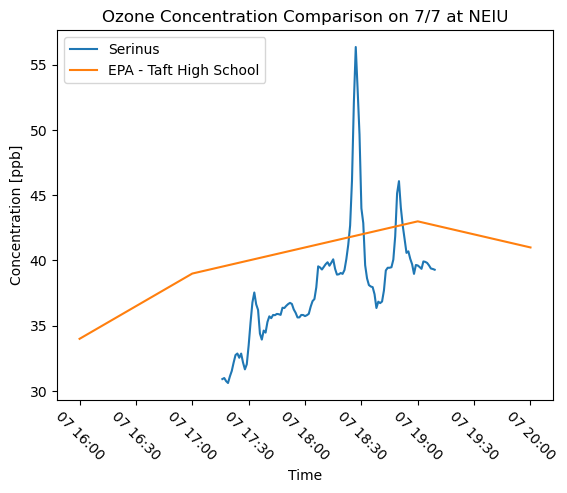

In [11]:
## Comparing the Serinus dataset of Ozone to the nearby EPA station at Taft High School.
plt.plot(new_dt, o3_data["Ozone Average"], label="Serinus")
plt.plot(results["time"], results["OZONE"], label="EPA - Taft High School")
plt.xticks(rotation=315)
plt.ylabel("Concentration [ppb]")
plt.xlabel("Time")
plt.title("Ozone Concentration Comparison on 7/7 at NEIU")
plt.legend()
plt.savefig("EPA_Serinus_Comparison")

## Y-POD Data Compared To Serinus Data

This section compares Y-POD data compared to the Serinus Data. The Y-POD is a small portable device that can easily be deployed, and it is worthwhile to compare it to the Serinus sensor data. 

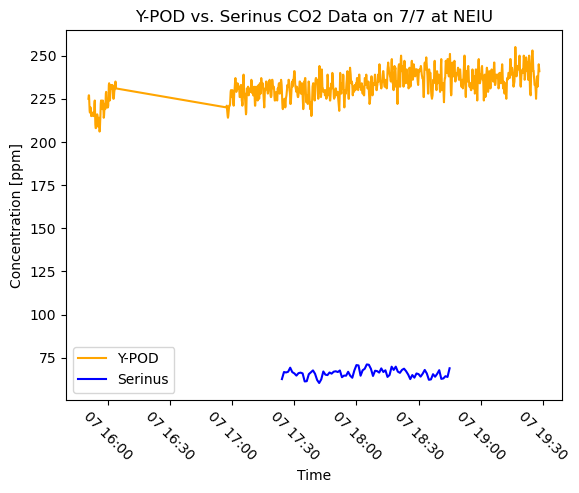

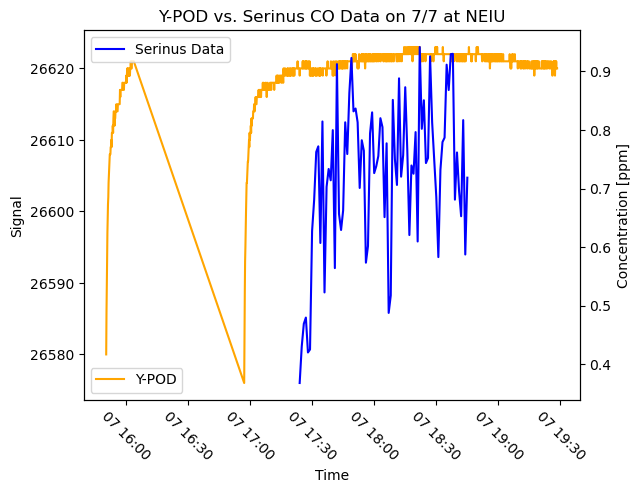

In [14]:
## Reading in the Y-POD data.
df = pd.read_csv("YPODX7_2023_7_7.txt")
df.columns=['y_pod_model','date','time','bme_temp_degrees_C','bme_pres_mb','temp_sht_degrees_C','humidity_sht_%_RH','raw_CO2_PPM','raw_pm_<=1_micron','raw_pm_<=2.5_micron','raw_pm_<=10.0_micron','column_12','column_13','column_14','column_15','column_16','column_17','column_18','column_19','column_20','column_21','fig_210_heat','fig_210_sens','fig_280_heat','fig_280_sens','raw_co','adc2_channel2','e2vo3_heat','e2vo3_sens','GPS']


original_df = np.asarray(df["time"])
date_df = np.asarray(df["date"])
original_df = date_df + " " + original_df
dt = []
## Creating the time variables as datetime objects.
for i in range(len(df["time"])):
    dt.append(datetime.strptime(original_df[i], '%Y-%m-%d %H:%M:%S'))
new_dt_df = []
## Offsetting the time by 5 hours to account for UTC.
for i in dt:
    new_dt_df.append(i + timedelta(hours=5))

## Making a plot of CO2 from the Serinus sensors against the Y-POD data
## Recall the data from the Serinus sensors was corrupted after time t=82.
plt.plot(new_dt_df, df["raw_CO2_PPM"], color="orange", label="Y-POD")
plt.plot(new_dt_CO[0:82], CO_data["CO2 Concentration Average"][0:82], color="Blue", label="Serinus")
plt.legend()
plt.xticks(rotation=315)
plt.ylabel("Concentration [ppm]")
plt.xlabel("Time")
plt.title("Y-POD vs. Serinus CO2 Data on 7/7 at NEIU")
plt.savefig("Y-POD_Serinus_NEIU")


## Making CO plots from the Serinus sensors and comparing it to the Y-POD data. 
## Twin axes are needed because units from the Y-POD are uncertain.
fig, ax1 = plt.subplots()
plt.plot(new_dt_df, df['raw_co'], color="orange", label="Y-POD")
plt.legend()
plt.xticks(rotation=315)
plt.ylabel("Signal")
plt.xlabel("Time")
plt.title("Y-POD vs. Serinus CO Data on 7/7 at NEIU")

ax2 = ax1.twinx()
ax2.plot(new_dt_CO[0:82], CO_data["CO Concentration Average"][0:82], label="Serinus Data", color="Blue")
plt.ylabel("Concentration [ppm]")
plt.legend()

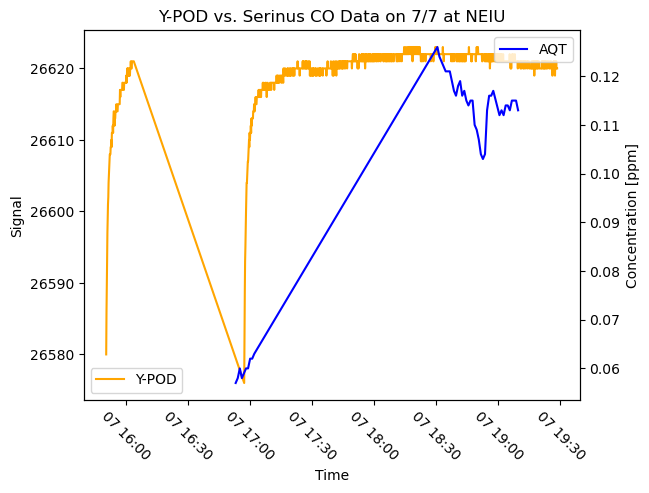

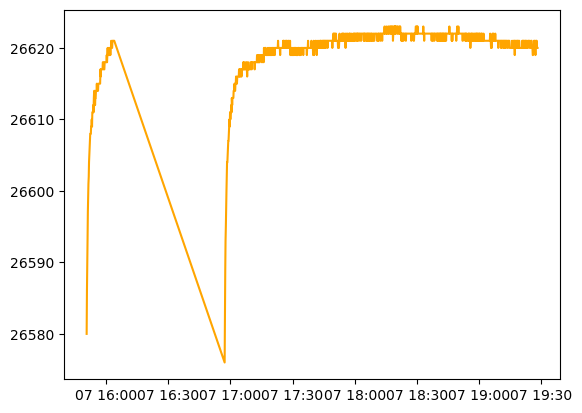

In [19]:
## Comparing the Y-POD data from CO against data from AQT
## Different axes were created because units from the Y-POD are uncertain. 
fig, ax1 = plt.subplots()
plt.plot(new_dt_df, df['raw_co'], color="orange", label="Y-POD")
plt.legend()
plt.xticks(rotation=315)
plt.ylabel("Signal")
plt.xlabel("Time")
plt.title("Y-POD vs. Serinus CO Data on 7/7 at NEIU")

ax2 = ax1.twinx()
ax2.plot(co["timestamp"], co["value"], label="AQT", color="Blue")
plt.ylabel("Concentration [ppm]")
plt.legend()

## This graph is not important for now.
fig, ax3 = plt.subplots()
plt.plot(new_dt_df, df['raw_co'], color="orange", label="Y-POD")

In [18]:
df.columns

Index(['y_pod_model', 'date', 'time', 'bme_temp_degrees_C', 'bme_pres_mb',
       'temp_sht_degrees_C', 'humidity_sht_%_RH', 'raw_CO2_PPM',
       'raw_pm_<=1_micron', 'raw_pm_<=2.5_micron', 'raw_pm_<=10.0_micron',
       'column_12', 'column_13', 'column_14', 'column_15', 'column_16',
       'column_17', 'column_18', 'column_19', 'column_20', 'column_21',
       'fig_210_heat', 'fig_210_sens', 'fig_280_heat', 'fig_280_sens',
       'raw_co', 'adc2_channel2', 'e2vo3_heat', 'e2vo3_sens', 'GPS'],
      dtype='object')